# Data Importing

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px 
import numpy as np
import requests
import json
import csv
#import folium
import hvplot.pandas
from config import geoapify_key




In [8]:
df = pd.read_csv("Data_Analyst_Data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Data Cleaning 

In [9]:
# Check to see how many rows and columns we have
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 9355
Number of Columns: 12


In [10]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [11]:
# Check to see whether there are duplicates
duplicate_rows = df[df.duplicated()]
# Print the number of duplicates
num_duplicates = duplicate_rows.shape[0]
print("Number of duplicate rows:", num_duplicates)

null_values = df.isnull().sum()
# Check Data to make sure that the data set does not have any Null values
print("Null values count for each column:")
print(null_values)

Number of duplicate rows: 4014
Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


# Unique Job Titles

In [12]:
# Find the unique count of the specific job titles 
specific_jobs = df["job_title"].value_counts()
specific_jobs

job_title
Data Engineer                               2195
Data Scientist                              1989
Data Analyst                                1388
Machine Learning Engineer                    991
Applied Scientist                            272
Research Scientist                           269
Analytics Engineer                           256
Data Architect                               213
Business Intelligence Engineer               144
Research Engineer                            144
Data Manager                                 132
ML Engineer                                  106
Data Science Manager                          88
Machine Learning Scientist                    76
Business Intelligence Analyst                 54
BI Developer                                  52
Data Science Consultant                       44
Data Specialist                               40
Research Analyst                              39
Decision Scientist                            38
Data Analy

In [13]:
#Get the top 10 job titles
data_df= df['job_title'].value_counts().reset_index()
data_df.columns = ['job_title', 'count']
data_df = data_df.sort_values(by='count', ascending=False)
data_df.head(10)

,job_title,count
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Business Intelligence Engineer,144
9,Research Engineer,144


In [57]:
#Find the top 10 job titles in the United States  
data_df = df.groupby(['company_location', 'job_title']).size().reset_index(name='count')
data_df = data_df.sort_values(by='count', ascending=False)
data_df = data_df.head(10)
data_df

,company_location,job_title,count
373,United States,Data Engineer,1937
396,United States,Data Scientist,1720
365,United States,Data Analyst,1219
419,United States,Machine Learning Engineer,869
346,United States,Applied Scientist,271
437,United States,Research Scientist,244
342,United States,Analytics Engineer,224
371,United States,Data Architect,199
356,United States,Business Intelligence Engineer,140
436,United States,Research Engineer,131


### Plotting the graphs

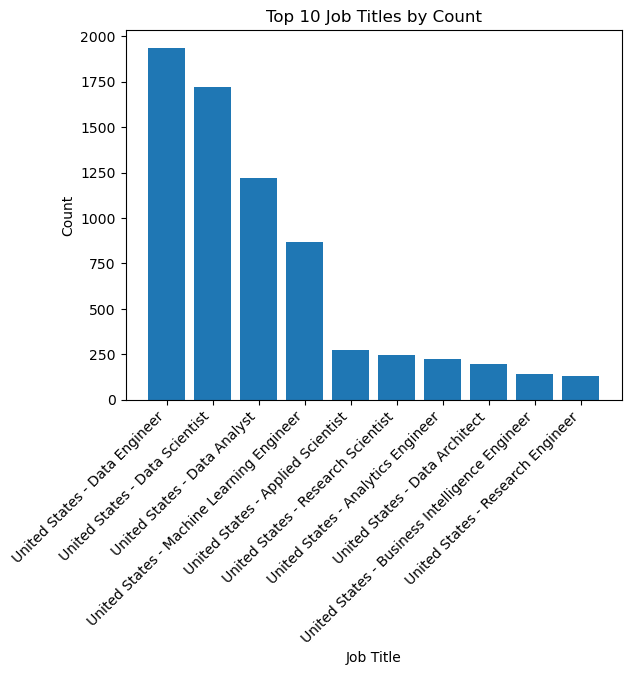

<Figure size 2000x1500 with 0 Axes>

In [58]:
#Plot a bar graph
top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

plt.bar(top_10_jobs['company_location'] + ' - ' + top_10_jobs['job_title'], top_10_jobs['count'])
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles by Count')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'United States - Data Engineer'

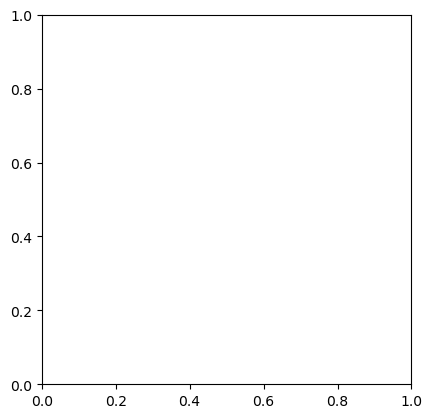

In [64]:
#plot a line graph 
top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

plt.pie(top_10_jobs['company_location'] + ' - ' + top_10_jobs['job_title'], top_10_jobs['count'])
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles by Count')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Top 10 Salary per Year

In [19]:
mean_salary_by_year = df.groupby(["work_year", "job_title"]).agg({'salary_in_usd': 'mean'}).reset_index().sort_values(by=["work_year", "salary_in_usd"], ascending=False)

### mean_salary_by_year

In [81]:
mean_salary_2023 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2023].head(10)
mean_salary_2022 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2022].head(10)
mean_salary_2021 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2021].head(10)
mean_salary_2020 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2020].head(10)

In [82]:
mean_salary_2023

,work_year,job_title,salary_in_usd
134,2023,AI Architect,250328.000000
135,2023,AI Developer,133266.823529
136,2023,AI Engineer,171663.972222
137,2023,AI Programmer,76021.750000
138,2023,AI Research Engineer,85382.000000
139,2023,AI Scientist,68498.142857
140,2023,AWS Data Architect,258000.000000
141,2023,Analytics Engineer,159422.195000
142,2023,Analytics Engineering Manager,399880.000000
143,2023,Applied Data Scientist,60526.750000


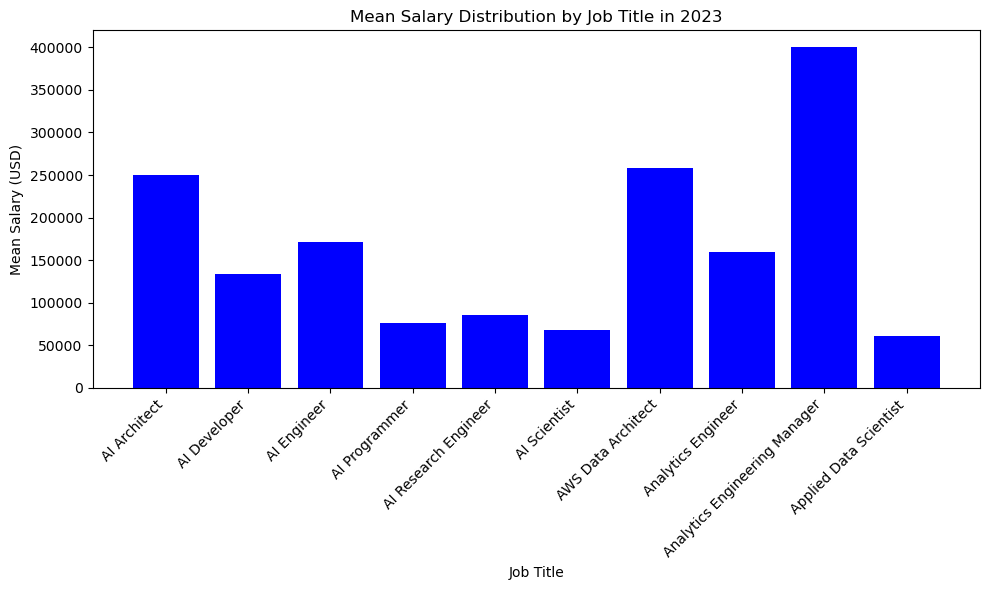

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_2023['job_title'], mean_salary_2023['salary_in_usd'], color='blue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
mean_salary_2022

,work_year,job_title,salary_in_usd
90,2022,Data Analytics Lead,405000.000000
102,2022,Data Science Tech Lead,375000.000000
70,2022,AI Developer,275000.000000
124,2022,Machine Learning Software Engineer,240440.000000
126,2022,Marketing Data Analyst,200000.000000
111,2022,Head of Data Science,195937.500000
101,2022,Data Science Manager,191360.300000
130,2022,Principal Machine Learning Engineer,190000.000000
77,2022,Applied Scientist,188311.111111
84,2022,Cloud Database Engineer,175000.000000


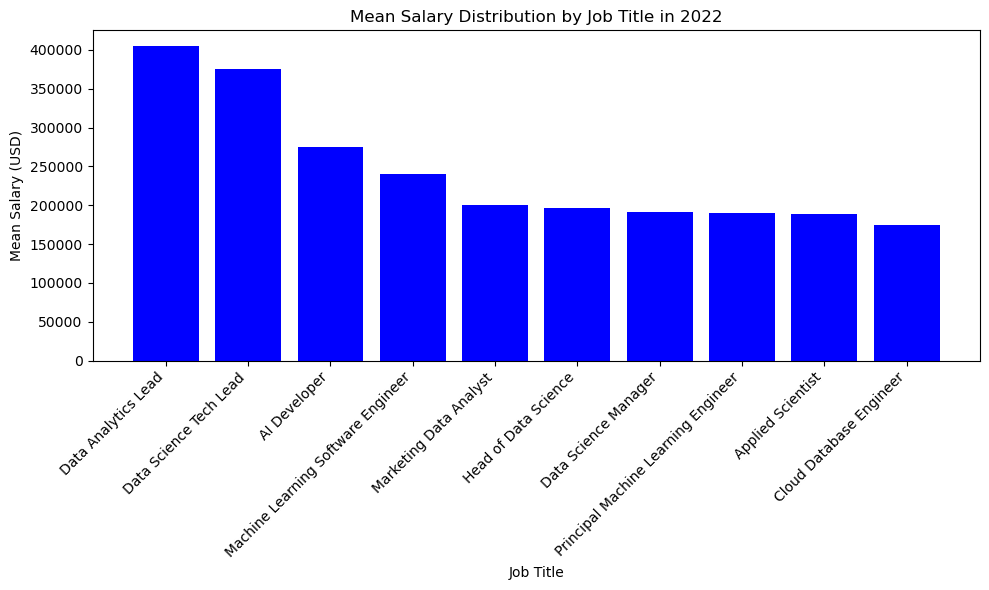

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_2022['job_title'], mean_salary_2022['salary_in_usd'], color='blue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
mean_salary_2021

,work_year,job_title,salary_in_usd
56,2021,ML Engineer,263000.000000
35,2021,Cloud Data Architect,250000.000000
66,2021,Principal Data Scientist,239152.400000
29,2021,Applied Machine Learning Scientist,230700.000000
59,2021,Machine Learning Infrastructure Engineer,195000.000000
65,2021,Principal Data Engineer,192500.000000
61,2021,Machine Learning Scientist,190000.000000
52,2021,Head of Data,189279.666667
69,2021,Staff Machine Learning Engineer,185000.000000
55,2021,Lead Data Engineer,179720.000000


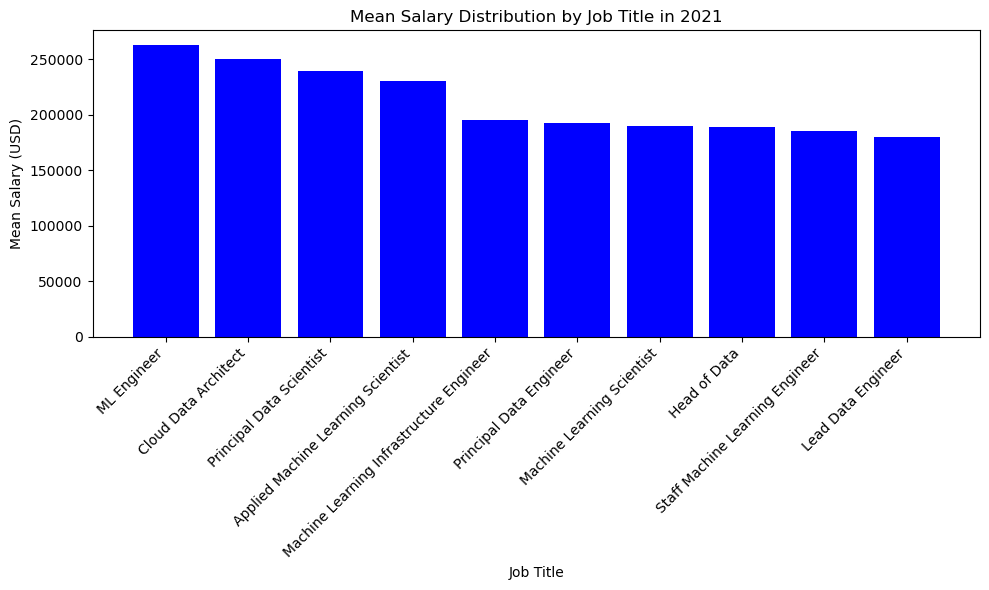

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_2021['job_title'], mean_salary_2021['salary_in_usd'], color='blue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2021')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
mean_salary_2020

,work_year,job_title,salary_in_usd
11,2020,Director of Data Science,325000.0
20,2020,Managing Director Data Science,300000.0
19,2020,Machine Learning Scientist,260000.0
23,2020,Research Scientist,246000.0
9,2020,Data Science Manager,190200.0
26,2020,Staff Data Scientist,164000.0
14,2020,Lead Data Scientist,152500.0
21,2020,Principal Data Scientist,148261.0
16,2020,Machine Learning Engineer,145904.5
18,2020,Machine Learning Manager,117104.0


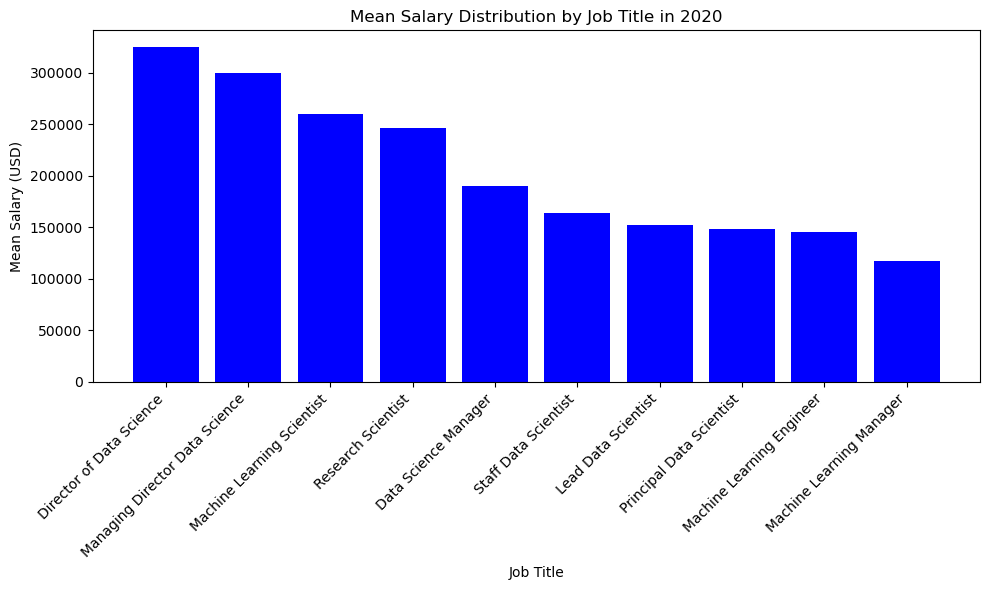

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_2020['job_title'], mean_salary_2020['salary_in_usd'], color='blue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
mean_salary_by_year.sort_values(by=["work_year", "salary_in_usd"], ascending=False)

,work_year,job_title,salary_in_usd
142,2023,Analytics Engineering Manager,399880.000000
216,2023,Head of Machine Learning,259000.000000
140,2023,AWS Data Architect,258000.000000
134,2023,AI Architect,250328.000000
209,2023,Director of Data Science,238153.523810
214,2023,Head of Data,223261.423077
207,2023,Deep Learning Engineer,215424.400000
215,2023,Head of Data Science,213281.000000
197,2023,Data Science Manager,209644.698113
221,2023,ML Engineer,205157.659091


In [ ]:
#plot a bar graph

In [ ]:
#plot a scatter plot 

## Job Title count by year

In [27]:
job_title_count_per_year = df.groupby(["work_year", "job_title"])["job_category"].count().reset_index().sort_values(by=["work_year", "job_category"], ascending=False)
job_title_count_per_year

,work_year,job_title,job_category
175,2023,Data Engineer,1662
199,2023,Data Scientist,1538
168,2023,Data Analyst,1091
223,2023,Machine Learning Engineer,864
146,2023,Applied Scientist,254
241,2023,Research Scientist,242
141,2023,Analytics Engineer,200
172,2023,Data Architect,164
159,2023,Business Intelligence Engineer,144
240,2023,Research Engineer,137


In [36]:
top_5_jobs = df.groupby(["work_year", "job_title"])["job_category"].count().reset_index().groupby("work_year").apply(lambda x: x.nlargest(5, "job_category")).reset_index(drop=True)
top_5_jobs

,work_year,job_title,job_category
0,2020,Data Scientist,19
1,2020,Data Engineer,11
2,2020,Data Analyst,6
3,2020,Machine Learning Engineer,4
4,2020,Big Data Engineer,3
5,2021,Data Engineer,35
6,2021,Data Scientist,34
7,2021,Data Analyst,19
8,2021,Machine Learning Engineer,16
9,2021,Research Scientist,10


## Experience Level Analysis

In [39]:
experience_level = df.groupby(["job_title","experience_level"])["job_category"].count().reset_index().sort_values(by=[ "job_category"], ascending=False)

,job_title,experience_level,job_category
156,Data Scientist,Senior,1540
106,Data Engineer,Senior,1534
84,Data Analyst,Senior,892
211,Machine Learning Engineer,Senior,833
105,Data Engineer,Mid-level,468
83,Data Analyst,Mid-level,363
155,Data Scientist,Mid-level,327
32,Applied Scientist,Senior,234
20,Analytics Engineer,Senior,201
98,Data Architect,Senior,190


In [40]:
df.groupby(["job_title", "experience_level", "company_size"])["job_category"].count().reset_index().sort_values(by=[ "job_category"], ascending=False)

,job_title,experience_level,company_size,job_category
240,Data Scientist,Senior,M,1475
172,Data Engineer,Senior,M,1469
139,Data Analyst,Senior,M,874
324,Machine Learning Engineer,Senior,M,800
169,Data Engineer,Mid-level,M,438
136,Data Analyst,Mid-level,M,346
237,Data Scientist,Mid-level,M,282
38,Analytics Engineer,Senior,M,198
158,Data Architect,Senior,M,184
395,Research Scientist,Senior,M,172


In [ ]:
#use pie chart to represent company size vs experience level 


In [ ]:
#use line graph to represent company size vs experience level 

In [41]:
top_titles = top_10_jobs["job_title"].tolist()

In [43]:
mean_salary_by_year[mean_salary_by_year.job_title.isin(top_titles)].sort_values(by=["work_year", "salary_in_usd"], ascending=False)

,work_year,job_title,salary_in_usd
223,2023,Machine Learning Engineer,191026.424769
241,2023,Research Scientist,190670.103306
146,2023,Applied Scientist,190303.452756
199,2023,Data Scientist,163713.765280
141,2023,Analytics Engineer,159422.195000
175,2023,Data Engineer,149944.588448
168,2023,Data Analyst,110988.393217
77,2022,Applied Scientist,188311.111111
118,2022,Machine Learning Engineer,151775.392523
133,2022,Research Scientist,142188.733333


In [ ]:
mean_salary_by_year = df.groupby(["work_year", "job_title"]).agg({'salary_in_usd': 'mean'}).reset_index()

In [47]:
# Group the data by country and company size, and count the number of companies in each group
company_size_counts = df.groupby(['company_location', 'company_size']).size().reset_index(name='company_count')
# Find the country with the most companies for each company size
largest_company_by_size = company_size_counts.sort_values(by='company_size', ascending=False)
#print(largest_company_by_size)
largest_company_by_size

,company_location,company_size,company_count
65,Italy,S,3
79,Moldova,S,1
41,France,S,5
44,Germany,S,18
46,Ghana,S,2
50,Greece,S,1
51,Honduras,S,1
54,India,S,1
57,Iraq,S,1
60,Ireland,S,1


In [49]:
#How have job category counts evolved annually across different company locations from 2020 to 2023?


# Assuming ‘df’ is your DataFrame and it includes ‘job_category’, ‘job_location’, and ‘year’ columns
# First, filter the DataFrame for the years of interest
years_of_interest = [2020, 2021, 2022, 2023]
df_filtered = df[df['work_year'].isin(years_of_interest)]
# Group the data by ‘year’, ‘job_location’, and ‘job_category’ and count the occurrences
category_counts = df_filtered.groupby(['work_year', 'company_location', 'job_category']).size().reset_index(name='Count')
# Pivot the table to have years as columns, job locations as rows, and counts of job categories as values
pivot_table = category_counts.pivot_table(index=['company_location', 'job_category'], columns='work_year', values='Count', fill_value=0)
# Display the pivot table
pivot_table.tail(10)


work_year                                        2020  2021  2022  2023
company_location job_category                                          
United States    BI and Visualization               0     0     4   284
                 Cloud and Database                 0     0     2     3
                 Data Analysis                      8    19   242   983
                 Data Architecture and Modeling     0     4    44   189
                 Data Engineering                   6    26   418  1527
                 Data Management and Strategy       0     1    11    44
                 Data Quality and Operations        0     0    12    38
                 Data Science and Research         15    28   409  2183
                 Leadership and Management          0     5    68   369
                 Machine Learning and AI            4    14   129  1043

In [ ]:
#“Insightful Analysis of Salary Statistics by Job Title and Category”
#QUESTION:
#“What are the salary trends across different job titles and categories, and how do these trends reflect on the average, median, minimum, and maximum salaries?

In [69]:
#job_title
# Assuming ‘df’ is your DataFrame and it has columns named ‘job_location’, ‘job_category’, and ‘salary’
# Group the data by ‘company_location’ and ‘job_category’ and calculate salary statistics
salary_stats = df.groupby(['job_title', 'job_category'])['salary'].agg(['mean', 'max', 'median', 'min']).reset_index()
# Rename columns for clarity
salary_stats.columns = ['job_title', 'Job Category', 'Average Salary', 'Maximum Salary', 'Median Salary', 'Minimum Salary']
# Display the salary statistics table
salary_stats.head(10)

,job_title,Job Category,Average Salary,Maximum Salary,Median Salary,Minimum Salary
0,AI Architect,Machine Learning and AI,249000.000000,330000,204000.0,146900
1,AI Developer,Machine Learning and AI,140500.000000,275000,127000.0,50000
2,AI Engineer,Machine Learning and AI,169208.416667,372000,172600.0,20000
3,AI Programmer,Machine Learning and AI,74000.000000,120000,70000.0,40000
4,AI Research Engineer,Data Science and Research,67275.000000,150000,48000.0,23100
5,AI Scientist,Machine Learning and AI,112277.777778,300000,110000.0,20000
6,AWS Data Architect,Data Architecture and Modeling,258000.000000,258000,258000.0,258000
7,Analytics Engineer,Leadership and Management,154036.515625,350000,149400.0,34800
8,Analytics Engineering Manager,Leadership and Management,325000.000000,325000,325000.0,325000
9,Applied Data Scientist,Data Science and Research,110863.636364,380000,80000.0,27500


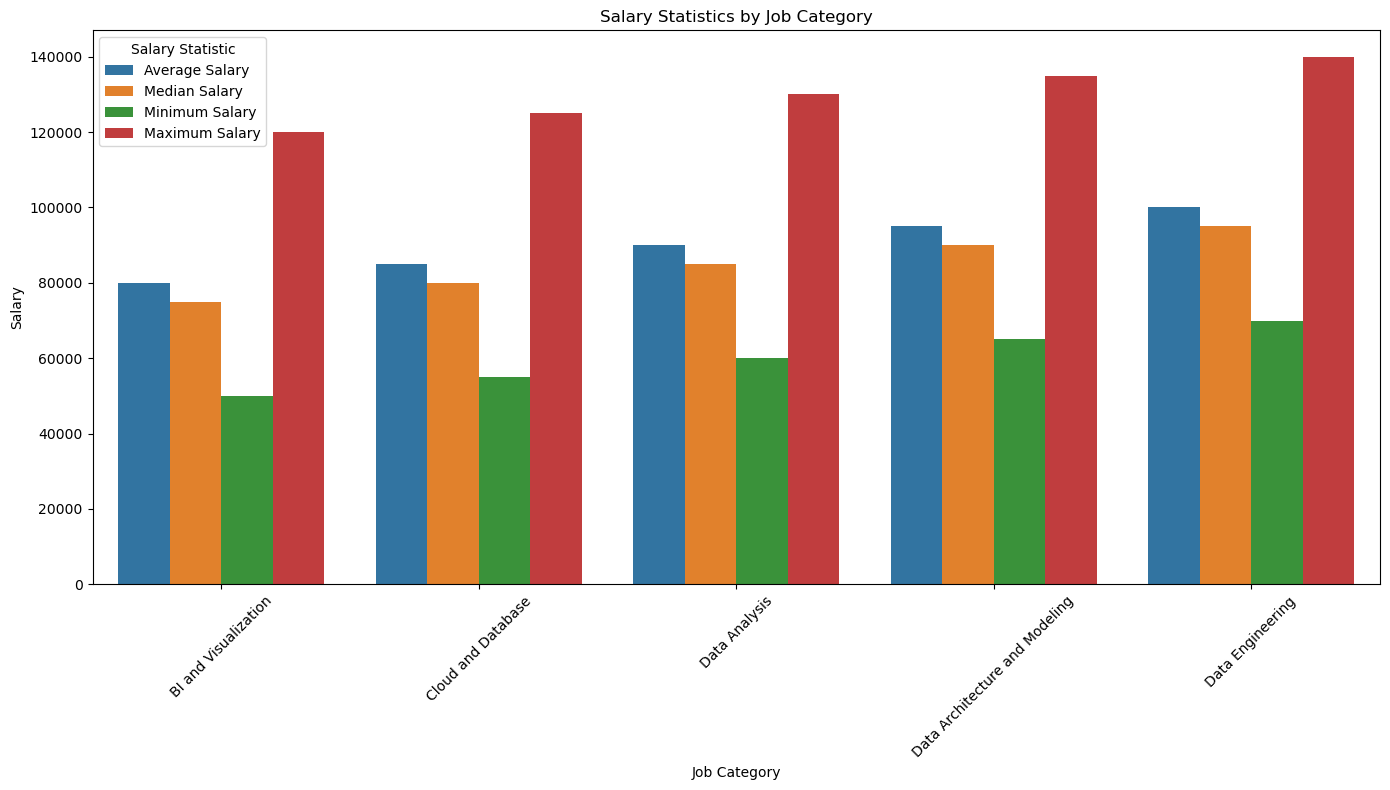

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Extended sample DataFrame setup with more job categories
data = {
    "company_location": ['Location1'] * 5,
    "Job Category": ['BI and Visualization', 'Cloud and Database', 'Data Analysis', 'Data Architecture and Modeling', 'Data Engineering'],
    "Average Salary": [80000, 85000, 90000, 95000, 100000],
    "Median Salary": [75000, 80000, 85000, 90000, 95000],
    "Minimum Salary": [50000, 55000, 60000, 65000, 70000],
    "Maximum Salary": [120000, 125000, 130000, 135000, 140000]
}
df = pd.DataFrame(data)
# Melting the DataFrame to make it suitable for sns.barplot
df_melted = df.melt(id_vars=['Job Category'], value_vars=['Average Salary', 'Median Salary', 'Minimum Salary', 'Maximum Salary'],
                    var_name='Salary Statistic', value_name='Salary')
# Creating the plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Job Category', y='Salary', hue='Salary Statistic', data=df_melted)
# Adding plot details
plt.title("Salary Statistics by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.legend(title="Salary Statistic")
plt.tight_layout()
plt.show()

In [ ]:
#me: make graphs Top 5 jobs based on job title + year and Experience level (job title and experience level)